In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
contacts = pd.read_csv("/content/contacts.tsv", sep = '\t')
searches = pd.read_csv("/content/searches.tsv", sep = '\t')

In [6]:
contacts.isna().sum()

,0
id_guest,0
id_host,0
id_listing,0
ts_contact_at,0
ts_reply_at,604
ts_accepted_at,4196
ts_booking_at,5649
ds_checkin,0
ds_checkout,0
n_guests,0


In [9]:
searches.isna().sum()/len(searches)

,0
ds,0.000000
id_user,0.000000
ds_checkin,0.331561
ds_checkout,0.331561
n_searches,0.000000
n_nights,0.331561
n_guests_min,0.000000
n_guests_max,0.000000
origin_country,0.000000
filter_price_min,0.627221


In [12]:
searches = searches.drop(columns='filter_neighborhoods')

In [13]:
searches.head()

,ds,id_user,ds_checkin,ds_checkout,n_searches,n_nights,n_guests_min,n_guests_max,origin_country,filter_price_min,filter_price_max,filter_room_types
0,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-12,16,3.0,2,2,IE,0.0,67.0,",Entire home/apt,Entire home/apt,Private room,..."
1,2014-10-01,0000af0a-6f26-4233-9832-27efbfb36148,2014-10-09,2014-10-19,3,10.0,1,2,IE,0.0,67.0,NaN
2,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,NaN,NaN,1,NaN,1,1,GB,NaN,NaN,NaN
3,2014-10-01,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,2014-11-08,2014-11-10,11,2.0,1,2,GB,NaN,NaN,",Entire home/apt"
4,2014-10-01,001c04f0-5a94-4ee0-bf5d-3591265256de,NaN,NaN,1,NaN,1,1,IE,NaN,NaN,NaN


In [14]:
searches['ds'] = pd.to_datetime(searches['ds'])
searches['ds_checkin'] = pd.to_datetime(searches['ds_checkin'])
searches['ds_checkout'] = pd.to_datetime(searches['ds_checkout'])

In [15]:
searches["length_preparation"] = searches["ds_checkin"] - searches["ds"]

In [17]:
display(searches.describe())

,ds,ds_checkin,ds_checkout,n_searches,n_nights,n_guests_min,n_guests_max,filter_price_min,filter_price_max,length_preparation
count,35737,23888,23888,35737.000000,23888.000000,35737.000000,35737.000000,13322.000000,1.332200e+04,23888
mean,2014-10-07 14:32:34.478551552,2014-11-27 22:42:10.609511168,2014-12-05 14:50:57.468184832,9.206565,7.672765,1.742955,2.105857,8.470200,9.019063e+07,51 days 08:11:53.730743469
min,2014-10-01 00:00:00,2014-10-01 00:00:00,2014-10-02 00:00:00,1.000000,0.000000,1.000000,1.000000,0.000000,9.000000e+00,-1 days +00:00:00
25%,2014-10-04 00:00:00,2014-10-17 00:00:00,2014-10-23 00:00:00,1.000000,2.000000,1.000000,1.000000,0.000000,8.600000e+01,10 days 00:00:00
50%,2014-10-08 00:00:00,2014-11-03 00:00:00,2014-11-09 00:00:00,4.000000,3.000000,1.000000,2.000000,0.000000,1.390000e+02,26 days 00:00:00
75%,2014-10-11 00:00:00,2014-12-13 00:00:00,2014-12-24 00:00:00,10.000000,5.000000,2.000000,2.000000,0.000000,3.010000e+02,67 days 00:00:00
max,2014-10-14 00:00:00,2016-06-02 00:00:00,2016-08-17 00:00:00,448.000000,399.000000,16.000000,16.000000,1250.000000,1.073742e+09,604 days 00:00:00
std,NaN,NaN,NaN,17.348746,21.557614,1.460440,1.817358,53.987679,2.978482e+08,65 days 18:56:19.491940518


In [18]:
display(searches.skew(axis = 0, numeric_only = True, skipna = True))

,0
n_searches,7.509258
n_nights,9.942364
n_guests_min,3.583798
n_guests_max,3.148548
filter_price_min,11.087745
filter_price_max,2.999833


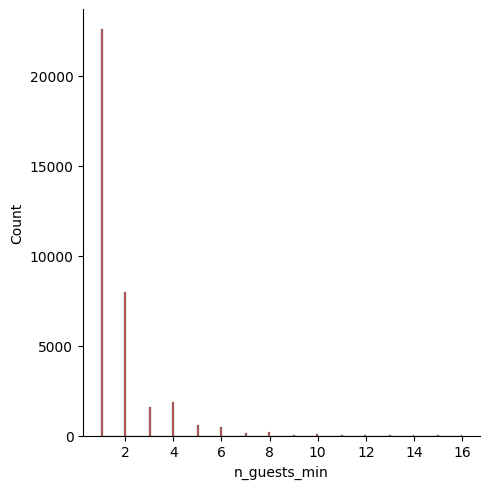

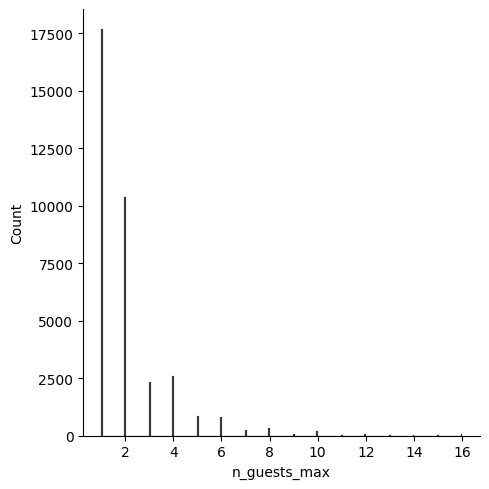

In [19]:
sns.displot(searches, x = 'n_guests_min', color = 'brown')
sns.displot(searches, x = 'n_guests_max', color = 'black')
plt.show()

[[None, None, None, None, None, None, None]]

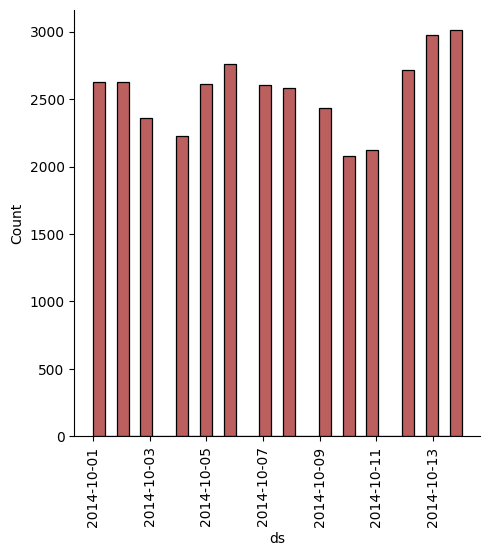

In [22]:
ax = sns.displot(searches, x = 'ds', color = 'brown')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in ax.axes.flat]

In [23]:
print(len(searches[searches['filter_price_max'] > 600])/len(searches['filter_price_max'])*100, '%')

5.311022189887232 %


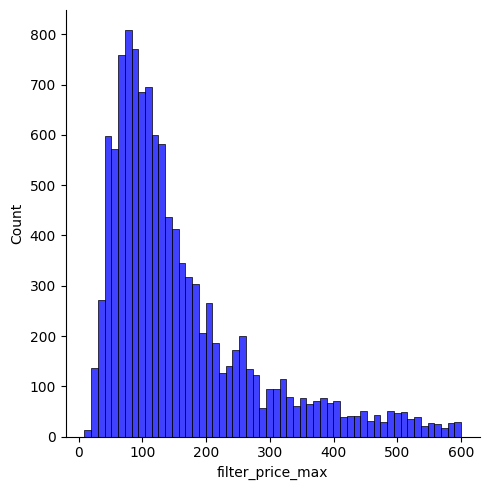

In [24]:
searches_maxprice_removed = searches[searches['filter_price_max'] <= 600]
sns.displot(x=searches_maxprice_removed["filter_price_max"], color = 'blue')
plt.show()

9.396423874415872 % 



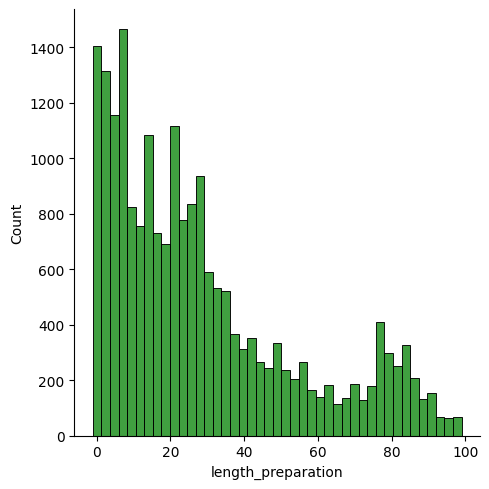

In [26]:
distribution = searches["length_preparation"] / np.timedelta64(1, 'D')
print(len(distribution[distribution > 100])/len(distribution)*100, '% \n')
distribution = distribution[distribution < 100]
sns.displot(x=distribution, color = 'green')
plt.show()

4.737387021854101 % 



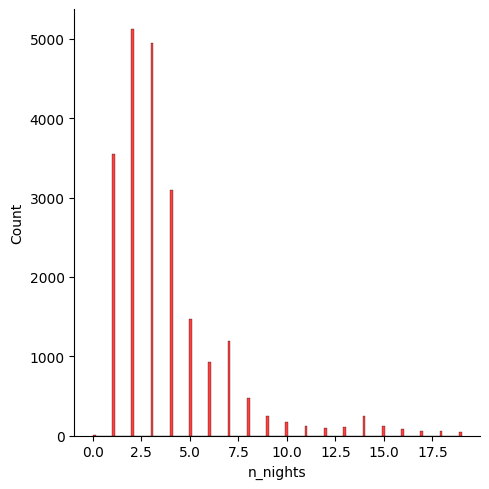

In [27]:
print(len(searches[searches['n_nights'] > 20])/len(searches['n_nights'])*100, '% \n')
searches_within_twenty = searches[searches['n_nights'] < 20]
sns.displot(searches_within_twenty, x='n_nights', color = 'red')
plt.show()

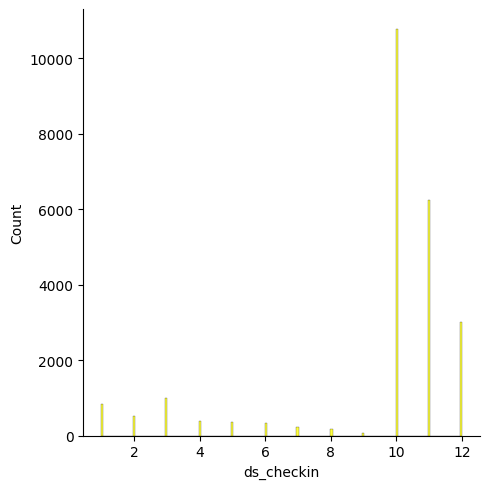

In [28]:
checkin_month = pd.DatetimeIndex(searches['ds_checkin']).month
sns.displot(checkin_month, color = 'yellow')
plt.show()

In [29]:
searches['filter_room_types'].unique()[0:15]

array([',Entire home/apt,Entire home/apt,Private room,Private room', nan,
       ',Entire home/apt',
       'Entire home/apt,Entire home/apt,Private room,Private room',
       'Entire home/apt', ',Shared room,Private room',
       'Entire home/apt,Private room,Shared room,Private room,Shared room',
       'Private room', 'Entire home/apt,Private room', ',Private room',
       ',Entire home/apt,Private room',
       ',Entire home/apt,Private room,Private room',
       'Entire home/apt,Private room,Shared room',
       ',Entire home/apt,Entire home/apt,Private room',
       ',Entire home/apt,Entire home/apt,Shared room,Shared room'],
      dtype=object)

In [30]:
search_origin = searches.groupby("origin_country").agg({'origin_country' : 'count'})
search_origin.columns = ['count']
search_origin = search_origin.sort_values('count', ascending = False)
search_origin.nlargest(15, 'count')

,count
origin_country,
IE,6608
US,5811
GB,4832
FR,3444
IT,2333
DE,2170
ES,1759
CA,1085
AU,962


In [31]:
contacts['ts_contact_at'] = pd.to_datetime(contacts['ts_contact_at'])
contacts['ts_reply_at'] = pd.to_datetime(contacts['ts_reply_at'])
contacts['ts_accepted_at'] = pd.to_datetime(contacts['ts_accepted_at'])
contacts['ts_booking_at'] = pd.to_datetime(contacts['ts_booking_at'])
contacts['ds_checkin'] = pd.to_datetime(contacts['ds_checkin'])
contacts['ds_checkout'] = pd.to_datetime(contacts['ds_checkout'])
contacts['accepted'] = np.where(np.isnan(contacts['ts_accepted_at']), False, True)

contacts['length_stay'] = contacts['ds_checkout'] - contacts['ds_checkin']

display(contacts.dtypes)
display(contacts.describe())

,0
id_guest,object
id_host,object
id_listing,object
ts_contact_at,datetime64[ns]
ts_reply_at,datetime64[ns]
ts_accepted_at,datetime64[ns]
ts_booking_at,datetime64[ns]
ds_checkin,datetime64[ns]
ds_checkout,datetime64[ns]
n_guests,int64


,ts_contact_at,ts_reply_at,ts_accepted_at,ts_booking_at,ds_checkin,ds_checkout,n_guests,n_messages,length_stay
count,7823,7219,3627,2174,7823,7823,7823.000000,7823.000000,7823
mean,2014-10-10 11:59:33.640802816,2014-10-10 22:42:36.511982336,2014-10-11 14:07:07.993382912,2014-10-13 07:54:43.307267840,2014-11-16 09:47:00.452511744,2014-11-22 05:12:33.317141760,2.422600,6.319954,5 days 19:25:32.864629937
min,2014-03-04 11:08:13,2014-04-18 09:39:06,2014-05-21 16:51:54,2014-05-21 16:51:54,2014-10-01 00:00:00,2014-10-02 00:00:00,1.000000,1.000000,1 days 00:00:00
25%,2014-10-03 16:28:52,2014-10-03 23:07:32,2014-10-04 13:45:13,2014-10-05 13:53:46,2014-10-15 00:00:00,2014-10-19 00:00:00,1.000000,2.000000,2 days 00:00:00
50%,2014-10-08 17:34:36,2014-10-09 00:16:21,2014-10-09 13:46:50,2014-10-10 11:15:13,2014-10-31 00:00:00,2014-11-06 00:00:00,2.000000,4.000000,3 days 00:00:00
75%,2014-10-13 21:28:51.500000,2014-10-14 10:00:04.500000,2014-10-14 16:28:27.500000,2014-10-15 13:16:17.249999872,2014-11-22 00:00:00,2014-11-30 00:00:00,3.000000,8.000000,5 days 00:00:00
max,2015-02-02 08:45:18,2015-02-02 23:18:25,2015-02-03 14:16:42,2015-01-21 16:16:29,2015-10-24 00:00:00,2015-12-01 00:00:00,16.000000,102.000000,334 days 00:00:00
std,NaN,NaN,NaN,NaN,NaN,NaN,1.617347,6.472827,14 days 23:45:24.447710564


In [32]:
display(contacts.skew(axis = 0, numeric_only = True, skipna = True))

,0
n_guests,2.441468
n_messages,3.696440
accepted,0.145883


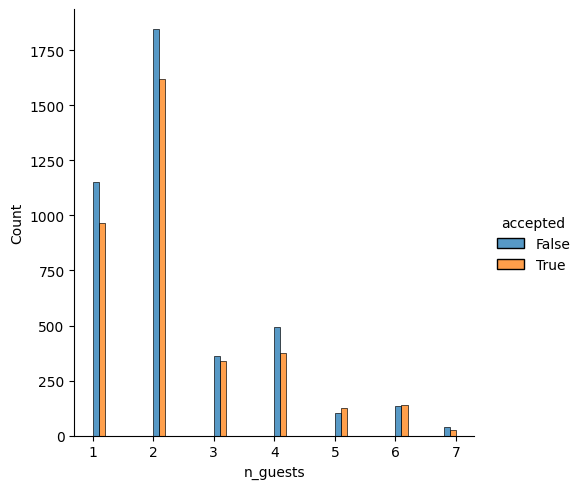

In [33]:
contacts_less8 = contacts[contacts['n_guests'] < 8]
sns.displot(contacts_less8, x = 'n_guests', hue = 'accepted', multiple="dodge")
plt.show()

In [34]:
contacts['ts_booking_at'].count()/contacts['ts_accepted_at'].count()

np.float64(0.5993934381031155)

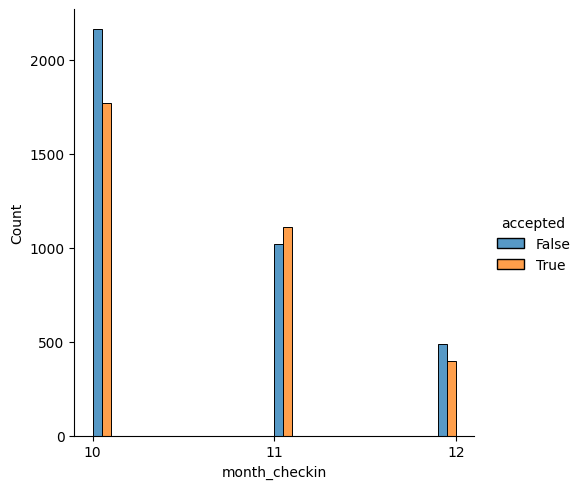

In [35]:
contacts['month_checkin'] = contacts['ds_checkin'].dt.month #Extract month from checkin date
contacts_checkin = contacts[contacts['month_checkin'] > 9] #Use only peak season months (Oct, Nov, Dec)

sns.displot(contacts_checkin, x='month_checkin', hue = 'accepted', multiple="dodge")
plt.xticks([10, 11, 12])
plt.show()

In [36]:
merged_datasets = contacts.merge(searches, left_on='id_guest', right_on='id_user')

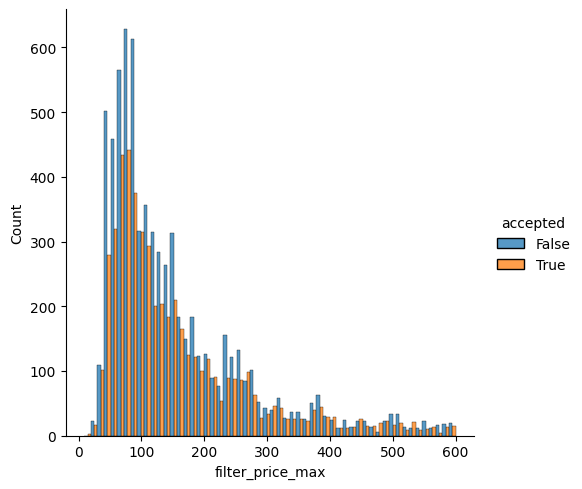

In [37]:
merged_pricemax_filter = merged_datasets.loc[(merged_datasets['filter_price_max'] <= 600)]

sns.displot(merged_pricemax_filter, x="filter_price_max", hue="accepted", multiple="dodge")
plt.show()

In [38]:
def label_price (row):
    if (row['filter_price_max'] >= 0) & (row['filter_price_max'] < 100):
        return '0-100'

    elif (row['filter_price_max'] >= 100) & (row['filter_price_max'] < 200):
        return '100-200'

    elif (row['filter_price_max'] >= 200) & (row['filter_price_max'] < 300):
        return '200-300'

    elif (row['filter_price_max'] >= 300) & (row['filter_price_max'] < 400):
        return '300-400'

    elif (row['filter_price_max'] >= 400) & (row['filter_price_max'] < 500):
        return '400-500'

    elif (row['filter_price_max'] >= 500) & (row['filter_price_max'] < 600):
        return '500-600'

    else:
        return '600+'

merged_datasets['classification_max_price'] = merged_datasets.apply(lambda row: label_price(row), axis=1)

merged_datasets.groupby('classification_max_price').agg({'accepted': 'mean'})

,accepted
classification_max_price,
0-100,0.411160
100-200,0.430308
200-300,0.431149
300-400,0.450488
400-500,0.485549
500-600,0.422297
600+,0.433122


In [42]:
dataset_country = merged_datasets[['origin_country', 'accepted']]

accepted_count = dataset_country.groupby(['origin_country', 'accepted']).agg({'origin_country':'count'})
accepted_count.columns = ['count_accepted']

country_count = dataset_country.groupby(['origin_country']).agg({'origin_country':'count'})
country_count.columns = ['count_country']


acceptance_country = pd.merge(dataset_country, accepted_count,  how='left', on=['origin_country','accepted']) #Merge accepted count
acceptance_country = acceptance_country.drop_duplicates()
acceptance_country = pd.merge(acceptance_country, country_count, how='left', on=['origin_country']) #Merge total country count

acceptance_country = acceptance_country.sort_values(['count_country', 'accepted'], ascending = [False, True])
acceptance_country = acceptance_country[acceptance_country['count_country'] >= 100] #100 is used so there is a good amount of data to make assumptions
acceptance_country = acceptance_country[acceptance_country['accepted'] == True]

#Divide count_accepted column by count_country column to find acceptance rate by country
acceptance_country['acceptance_rate'] = acceptance_country['count_accepted']/acceptance_country['count_country']
acceptance_country.sort_values(['acceptance_rate'], ascending = True)

,origin_country,accepted,count_accepted,count_country,acceptance_rate
73,IN,True,138,874,0.157895
55,HR,True,159,530,0.300000
54,RU,True,83,239,0.347280
72,AT,True,83,239,0.347280
11,IT,True,1183,3137,0.377112
100,AE,True,59,154,0.383117
0,CA,True,407,993,0.409869
13,IE,True,1217,2951,0.412403
24,ES,True,794,1914,0.414838
49,RO,True,50,118,0.423729
